In [ ]:
# Install requied packages

! pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

***IMPORT THE LIBIRAIES***
-

In [ ]:
# File Handling and Image Processing
import os
import zipfile
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

# Torch and Vision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Display and Progress
from IPython.display import display
from tqdm import tqdm

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

***TO READ THE ZIP DATASET***
-

In [ ]:
zip_path = "/content/Dataset.zip"

In [ ]:
#Zip path
zip_path = "/content/Dataset.zip"
#Extract path
extract_path = "/content/Dataset"
#To extract all zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
#To print the extract path
print("Unzipped successfully to:", extract_path)


Unzipped successfully to: /content/Dataset


***DO SOME VISULATION FOR BEFORE THE MODEL AND IDENTIFTY NUMBER OF IMAGES IN EACH FOLDER FOR BOTH TRAINING AND TESTING AND VALIDATION***
-

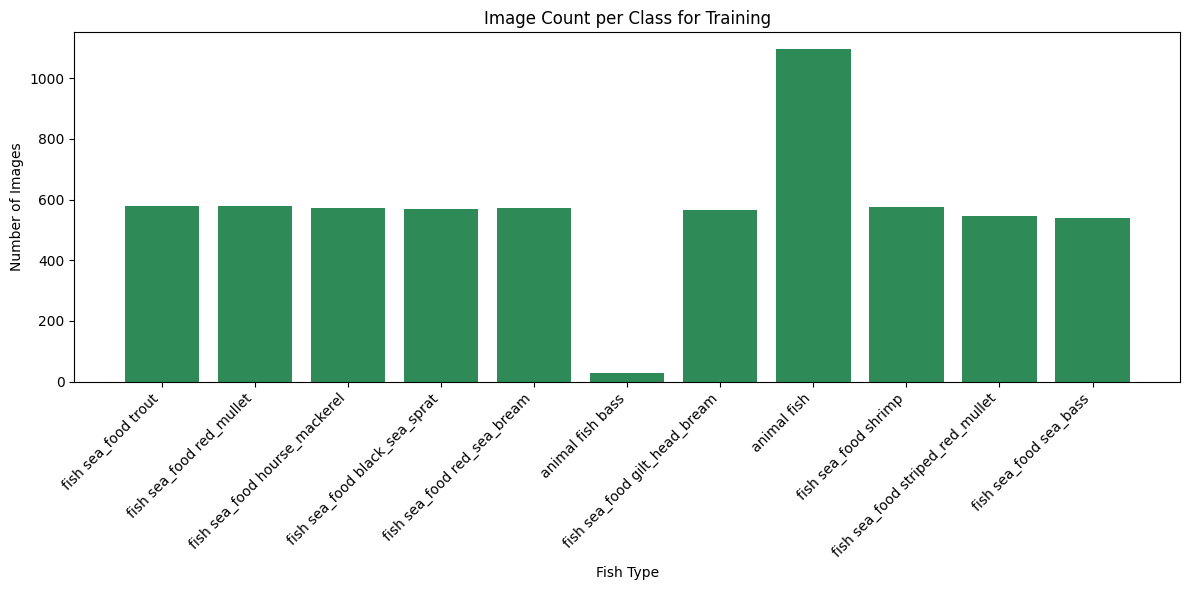

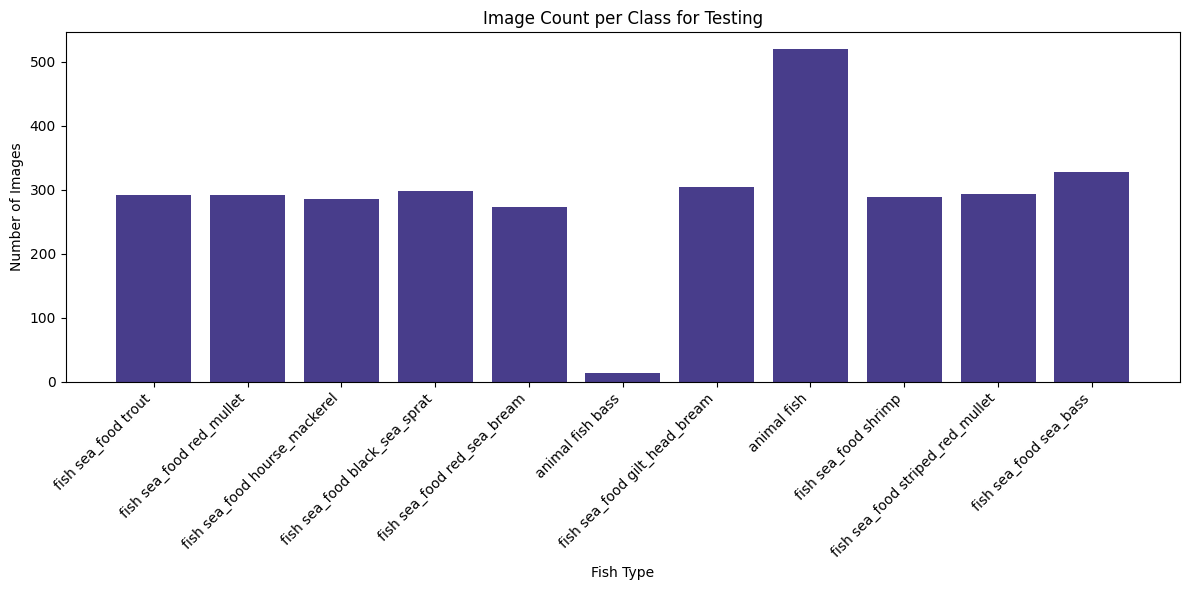

In [ ]:
#To load the training images path
data_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
#To create the dictionary
class_counts = {}
#using for loop and using os method list each folder
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot it
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color="seagreen")
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Training")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

#To load the testing images path
data_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
#To create the dictionary
class_counts = {}
#using for loop and using os method list each folder
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot it
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='darkslateblue')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Testing")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

  ***TO PLOT THE PIE CHART FOR BETTER UNDERSTADING THE DISTRUBTION OF EACH  FISH IMAGE CLASSIFICATION***
  -

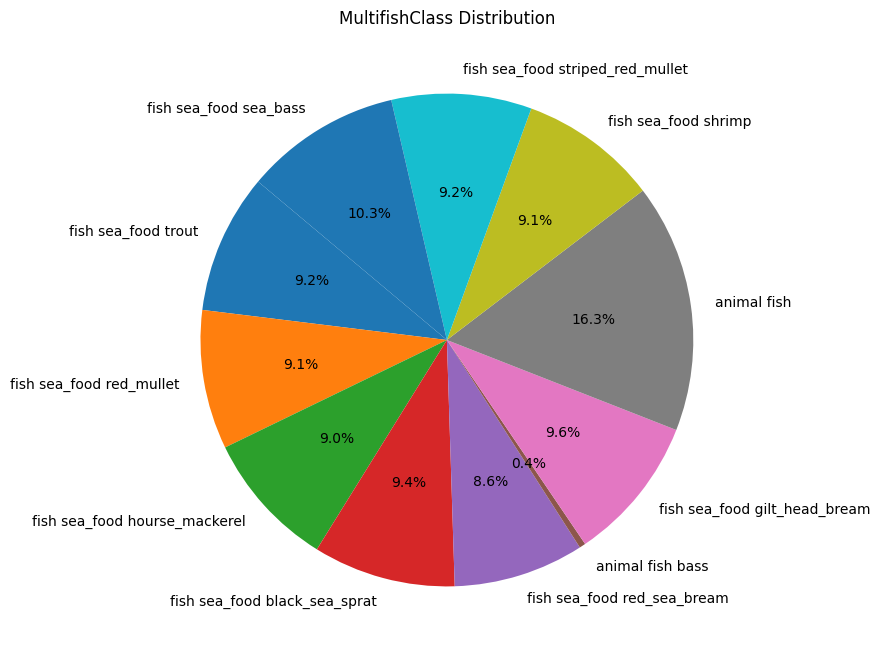

In [ ]:
# Pie chart
plt.figure(figsize=(8,8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("MultifishClass Distribution")
plt.show()


***TO IDENTIFY THE IMAGES IN EACH  FISH IMAGES FOLDER IN RADOMLING IN TRAINING DATA***
-

***

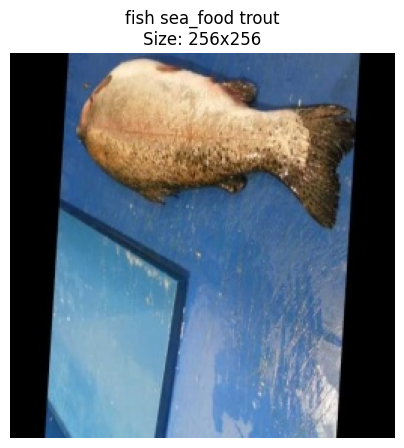

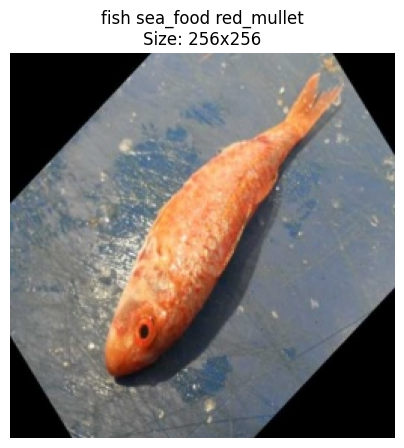

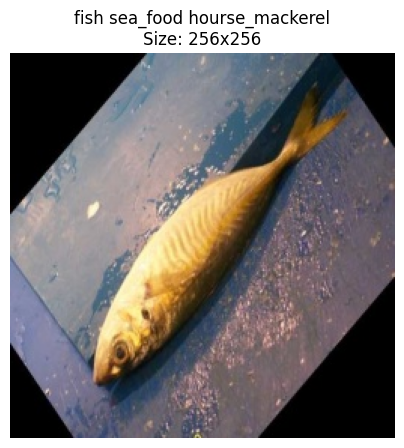

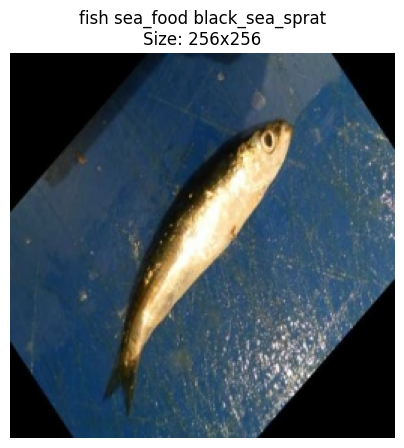

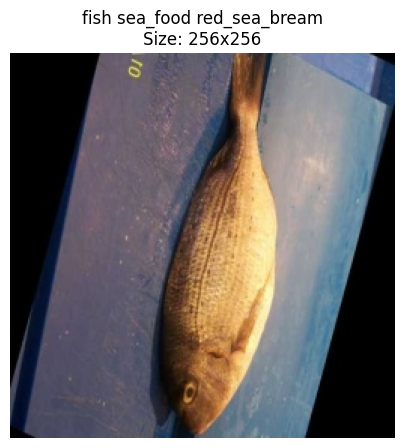

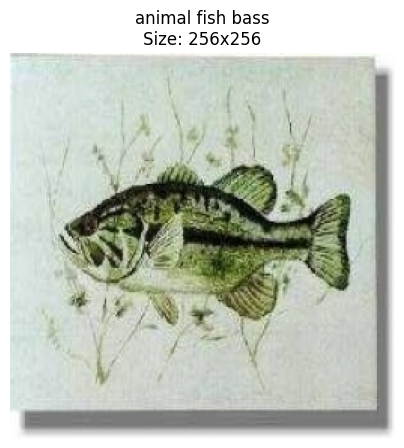

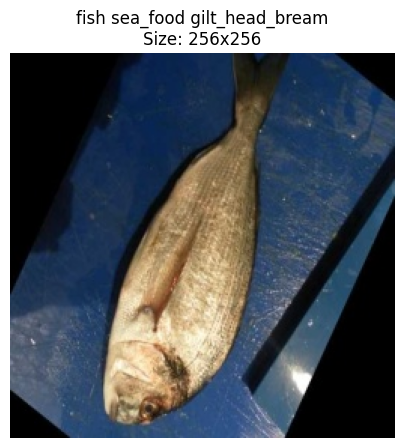

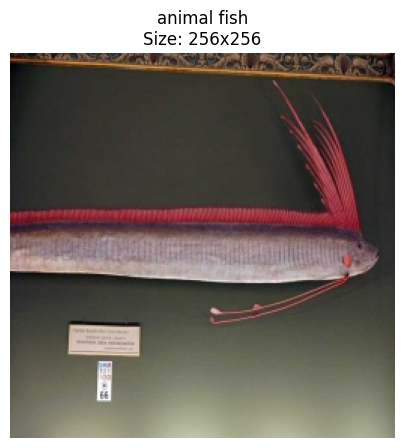

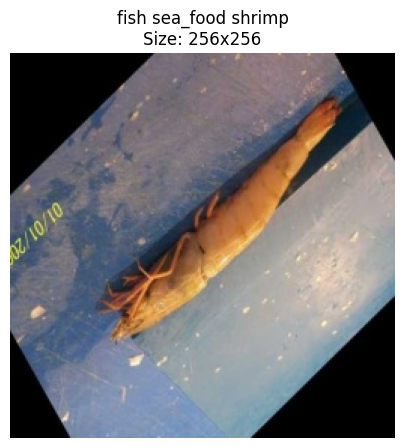

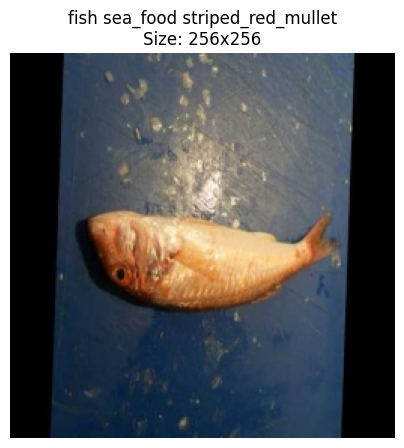

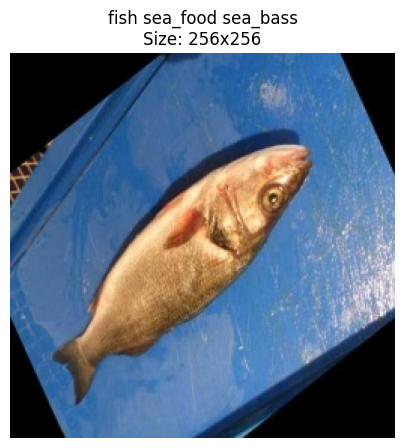

In [ ]:

#To load the training images path
data_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

#to create the function for random images show in traning dataset
def display_sample_images_with_size(data_path):
    # Loop through each class in the dataset
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)

        # Proceed only if it's a directory (i.e., a class)
        if os.path.isdir(class_path):
            # Get a random image from the class
            image_files = os.listdir(class_path)
            sample_image = random.choice(image_files)
            img_path = os.path.join(class_path, sample_image)

            # Read the image and get its dimensions
            img = mpimg.imread(img_path)
            height, width, _ = img.shape  # Get image height, width, and channels

            # Plot the image along with its size
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_name}\nSize: {width}x{height}")
            plt.show()

# Display sample images and their sizes for each class
display_sample_images_with_size(data_path)


*** IMAGE PREPROCESSING AND CLEANING STEPS***
-

In [ ]:


# Define transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize image
    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flip image horizontally
    transforms.RandomRotation(degrees=15),     # Random rotation between -15 to 15 degrees
    transforms.RandomAffine(degrees=0,         # No additional rotation
                            scale=(0.9, 1.1)), # Random zoom between 90% and 110%
    transforms.ToTensor(),                     # Convert to tensor and rescale to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    ])




***CREATE THE DATALOADER, BATCH_SIZE FOR TRAINING AND TESTING AND VALIDATION DATASET***
-



In [ ]:
# Apply transform to the training dataset
train_dataset = datasets.ImageFolder(root="/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test", transform=transform)

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the validation dataset
val_dataset = datasets.ImageFolder(root="/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val", transform=transform)

# Create DataLoader for validation
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the testing dataset
test_dataset = datasets.ImageFolder(root='/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test', transform=transform)

# Create DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)


***TO FIND THE NUMBER FISH IMAGES CLASSIFICATION***
-

In [ ]:
print((train_dataset.class_to_idx))

{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [ ]:
 #Convert class_to_idx dictionary to DataFrame
class_df = pd.DataFrame(list(train_dataset.class_to_idx.items()), columns=['Class Name', 'Class Index'])

# Display the DataFrame
print(class_df)

                          Class Name  Class Index
0                        animal fish            0
1                   animal fish bass            1
2      fish sea_food black_sea_sprat            2
3      fish sea_food gilt_head_bream            3
4      fish sea_food hourse_mackerel            4
5           fish sea_food red_mullet            5
6        fish sea_food red_sea_bream            6
7             fish sea_food sea_bass            7
8               fish sea_food shrimp            8
9   fish sea_food striped_red_mullet            9
10               fish sea_food trout           10


***CREATE THE SIMPILE CNN MODEL***
-

In [ ]:


# Define the model
model = nn.Sequential(
    # First Convolutional Block
    nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input: (3, 224, 224)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # Output: (32, 112, 112)
    nn.Dropout(p=0.5),

    # Second Convolutional Block
    nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Output: (64, 56, 56)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(p=0.5),

    # Flatten and Fully Connected Layers
    nn.Flatten(),
    nn.Linear(64 * 56 * 56, 128),  # First FC layer (input size: 64 * 56 * 56 = 200704)
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 11)  # Output layer (11 classes)
)

# Print the model architecture
print(model)


Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=200704, out_features=128, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=128, out_features=11, bias=True)
)


***TO INTILAZE THE LOSS FUNCTIONN AND OPTIMIZER***
-

In [ ]:
# Loss function (Cross-Entropy Loss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


***TO TRAIN THE MODEL***
-

In [ ]:

# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
epochs = 20
# Move model to the selected device (either GPU or CPU)
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for images, labels in train_loader:
        # Move data to the selected device (GPU or CPU)
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    # Calculate training loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct_preds / total_preds

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


Using device: cuda
Epoch [1/20], Loss: 3.0152, Accuracy: 0.1804
Epoch [2/20], Loss: 1.8916, Accuracy: 0.3288
Epoch [3/20], Loss: 1.5288, Accuracy: 0.4547
Epoch [4/20], Loss: 1.2421, Accuracy: 0.5485
Epoch [5/20], Loss: 1.1109, Accuracy: 0.5984
Epoch [6/20], Loss: 0.9383, Accuracy: 0.6561
Epoch [7/20], Loss: 0.8653, Accuracy: 0.6869
Epoch [8/20], Loss: 0.7729, Accuracy: 0.7207
Epoch [9/20], Loss: 0.7019, Accuracy: 0.7383
Epoch [10/20], Loss: 0.6362, Accuracy: 0.7625
Epoch [11/20], Loss: 0.6233, Accuracy: 0.7716
Epoch [12/20], Loss: 0.5856, Accuracy: 0.7832
Epoch [13/20], Loss: 0.5607, Accuracy: 0.7932
Epoch [14/20], Loss: 0.5484, Accuracy: 0.7979
Epoch [15/20], Loss: 0.5558, Accuracy: 0.8001
Epoch [16/20], Loss: 0.4669, Accuracy: 0.8309
Epoch [17/20], Loss: 0.4418, Accuracy: 0.8463
Epoch [18/20], Loss: 0.4497, Accuracy: 0.8406
Epoch [19/20], Loss: 0.4325, Accuracy: 0.8412
Epoch [20/20], Loss: 0.3971, Accuracy: 0.8557


***🔑 Key Observations from Your Training Logs***
-

>Loss is decreasing smoothly:

>Accuracy improves rapidly at first, then plateaus:

>From Epoch 1 to 10: Accuracy jumps from ~18% to ~76% — great learning phase.

>From Epoch 16 to 20: Smaller gains (83% to 85%), indicating nearing convergence.

>Best Accuracy = 85.57% (on training set):

>If test accuracy is similar → model is generalizing well.

***TO EVULATE THE MODEL AND FIND THE ACCURAY PRECISION AND RECALL AND F1_SCORE***
-

Accuracy: 93.22%
Precision: 93.69%
Recall: 93.22%
F1 Score: 93.07%


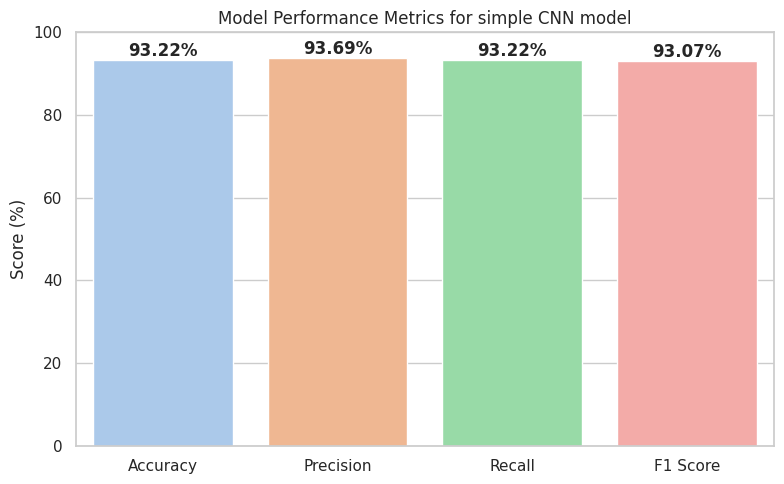

In [ ]:
#To intliaze the model for evulation
model.eval()

#To creating the list for both predictions and lables
all_preds = []
all_labels = []

# Disable gradient calculation for inference
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


# Set seaborn style for clean plots
sns.set(style="whitegrid")

# Metric values (scaled to percentage)
metrics = {
    'Accuracy': accuracy * 100,
    'Precision': precision * 100,
    'Recall': recall * 100,
    'F1 Score': f1 * 100
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')

# Add value labels on top of bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#labl=el and title
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for simple CNN model')
plt.tight_layout()
plt.show()


***CONFUSION MATRIX FOR SIMPLE CNN MODEL***
-

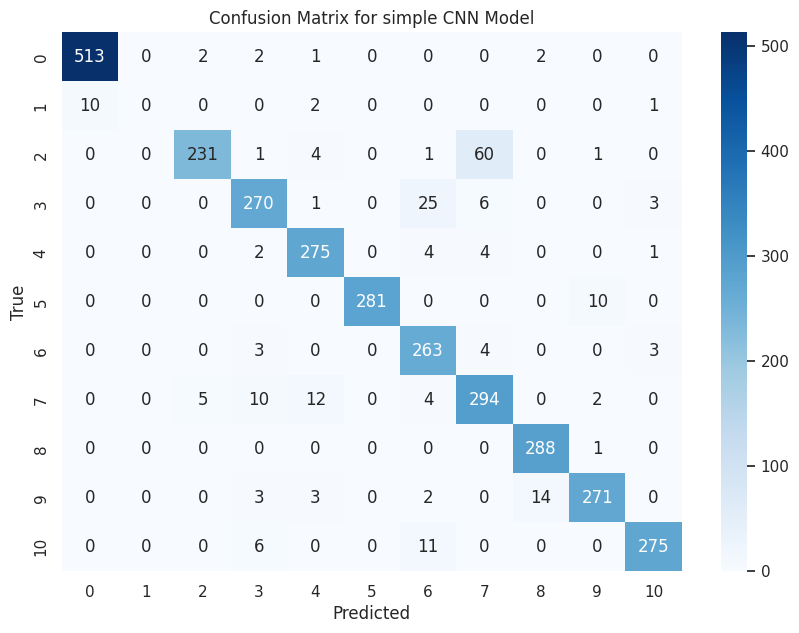

In [ ]:

# Get predictions on the test set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for simple CNN Model')
plt.show()


***SAVE THE MODEL***
-

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'cnn_model.pth')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Define class names
class_names = [
    'animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet', 'fish sea_food red_sea_bream',
    'fish sea_food sea_bass', 'fish sea_food shrimp',
    'fish sea_food striped_red_mullet', 'fish sea_food trout'
]

# Load the trained model
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # adjust if using InceptionV3 (299x299)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Function to predict image class
def predict_image_class(img_path):
    image = Image.open(img_path).convert('RGB')
    display(image)  # Show the image

    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_idx = torch.max(output, 1)

    predicted_class = class_names[predicted_idx.item()]
    print(f"\nPredicted Class: {predicted_class}")
    return predicted_class


***USES PRETRAINED VGG16 MODEL***

In [ ]:
# Load the pretrained model
vgg16 = models.vgg16(pretrained=True)


# Freeze all layers in the feature extraction part
for param in vgg16.features.parameters():
    param.requires_grad = False

# Get number of input features for the last FC layer
num_features = vgg16.classifier[6].in_features

# Replace the last FC layer
vgg16.classifier[6] = nn.Linear(num_features, 11)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 111MB/s]


***FROM PRETRAINED MODEL WE CAN ADD SOME LAYER AND DROUPOUT AND ACTIVATION FUNCTION***


In [ ]:
vgg16.classifier = nn.Sequential(
     # First fully connected layer (from flattened input size 25088)
    nn.Linear(25088, 4096),
    #Relu activation function
    nn.ReLU(True),
    #droupout for regularation
    nn.Dropout(),
     #second linear layer with size 4096
    nn.Linear(4096, 1024),
    #Relu activation function
    nn.ReLU(True),
    # droupout for regurlation
    nn.Dropout(),
    #final layer with 11 classes
    nn.Linear(1024, 11)  # 11 output classes
)

# Check if CUDA (GPU) is available and select device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#move the model to selected device either cpu or gpu
vgg16 = vgg16.to(device)


***Set up loss function and optimizer***

In [ ]:
# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.0001)


In [ ]:
#To create the function for training and validation
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    model.to(device)

    #using for loop epochs
    for epoch in range(epochs):
        print(f"\nEpoch [{epoch+1}/{epochs}]")
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2f}%")



    print("Training complete.")



***TO CALL THE FUNCTION WITH VGG16 MODEL***

In [ ]:
train_model(vgg16, train_loader, val_loader, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 100/100 [00:20<00:00,  5.00it/s]

Train Loss: 0.7871 | Train Accuracy: 74.43%


Val Loss: 0.2492 | Val Accuracy: 93.59%

Epoch [2/20]


100%|██████████| 100/100 [00:19<00:00,  5.02it/s]

Train Loss: 0.1930 | Train Accuracy: 93.85%


Val Loss: 0.1543 | Val Accuracy: 96.70%

Epoch [3/20]


100%|██████████| 100/100 [00:20<00:00,  4.95it/s]

Train Loss: 0.1122 | Train Accuracy: 96.45%


Val Loss: 0.1073 | Val Accuracy: 97.34%

Epoch [4/20]


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]

Train Loss: 0.0997 | Train Accuracy: 96.77%


Val Loss: 0.1313 | Val Accuracy: 95.60%

Epoch [5/20]


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]

Train Loss: 0.0747 | Train Accuracy: 97.65%


Val Loss: 0.0577 | Val Accuracy: 97.99%

Epoch [6/20]


100%|██████████| 100/100 [00:20<00:00,  4.82it/s]

Train Loss: 0.0647 | Train Accuracy: 97.68%


Val Loss: 0.0647 | Val Accuracy: 97.89%

Epoch [7/20]


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]

Train Loss: 0.0587 | Train Accuracy: 97.87%


Val Loss: 0.0639 | Val Accuracy: 97.89%

Epoch [8/20]


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]

Train Loss: 0.0555 | Train Accuracy: 98.12%


Val Loss: 0.1425 | Val Accuracy: 97.53%

Epoch [9/20]


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]

Train Loss: 0.0336 | Train Accuracy: 98.68%


Val Loss: 0.0600 | Val Accuracy: 98.17%

Epoch [10/20]


100%|██████████| 100/100 [00:20<00:00,  4.76it/s]

Train Loss: 0.0260 | Train Accuracy: 99.03%


Val Loss: 0.0777 | Val Accuracy: 98.72%

Epoch [11/20]


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]

Train Loss: 0.0416 | Train Accuracy: 98.71%


Val Loss: 0.0465 | Val Accuracy: 98.63%

Epoch [12/20]


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]

Train Loss: 0.0380 | Train Accuracy: 98.68%


Val Loss: 0.0823 | Val Accuracy: 97.99%

Epoch [13/20]


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]

Train Loss: 0.0413 | Train Accuracy: 98.59%


Val Loss: 0.0913 | Val Accuracy: 97.99%

Epoch [14/20]


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]

Train Loss: 0.0287 | Train Accuracy: 99.03%


Val Loss: 0.0514 | Val Accuracy: 98.44%

Epoch [15/20]


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]

Train Loss: 0.0367 | Train Accuracy: 98.71%


Val Loss: 0.0749 | Val Accuracy: 98.35%

Epoch [16/20]


100%|██████████| 100/100 [00:20<00:00,  4.78it/s]

Train Loss: 0.0335 | Train Accuracy: 98.93%


Val Loss: 0.1122 | Val Accuracy: 97.53%

Epoch [17/20]


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]

Train Loss: 0.0378 | Train Accuracy: 98.56%


Val Loss: 0.1415 | Val Accuracy: 96.06%

Epoch [18/20]


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]

Train Loss: 0.0180 | Train Accuracy: 99.28%


Val Loss: 0.0909 | Val Accuracy: 98.53%

Epoch [19/20]


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]

Train Loss: 0.0290 | Train Accuracy: 99.12%


Val Loss: 0.1040 | Val Accuracy: 97.89%

Epoch [20/20]


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]

Train Loss: 0.0465 | Train Accuracy: 98.53%


Val Loss: 0.1228 | Val Accuracy: 96.61%
Training complete.


***✅ Overall Performance Summary***
Peak Training Accuracy: ~99.28%

Peak Validation Accuracy: ~98.72%

General Trend: Model converged quickly (by Epoch 5), maintained high performance through 20 epochs.

(Epochs 6–12)
Both training and validation accuracy hover between 97.5%–99%.

Epoch 10: Highest Val Accuracy (98.72%) + very low loss (0.0777)


***EVULATE THE VGG16 PRETRAINED MODEL FOR ACCURAY PRECISION RECALL AND F1_SCORE***

[VGG16] Accuracy: 97.96%
[VGG16] Precision: 98.09%
[VGG16] Recall: 97.96%
[VGG16] F1 Score: 97.95%


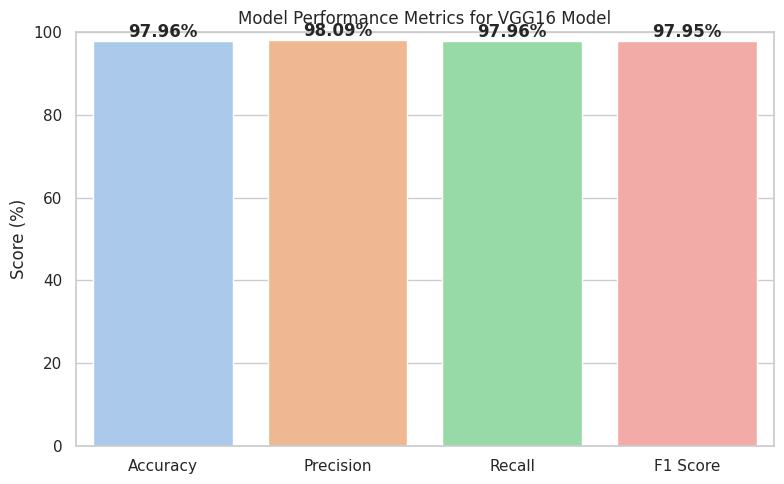

In [ ]:
# Set model to evaluation mode
vgg16.eval()

# Lists for storing predictions and labels
all_preds_vgg = []
all_labels_vgg = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_vgg.extend(predicted.cpu().numpy())
        all_labels_vgg.extend(labels.cpu().numpy())

# Compute metrics
accuracy_vgg = accuracy_score(all_labels_vgg, all_preds_vgg)
precision_vgg = precision_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
recall_vgg = recall_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
f1_vgg = f1_score(all_labels_vgg, all_preds_vgg, average='weighted', zero_division=0)
#print the compute metrices
print(f"[VGG16] Accuracy: {accuracy_vgg * 100:.2f}%")
print(f"[VGG16] Precision: {precision_vgg * 100:.2f}%")
print(f"[VGG16] Recall: {recall_vgg * 100:.2f}%")
print(f"[VGG16] F1 Score: {f1_vgg * 100:.2f}%")

# Plotting the performance metrics for VGG16
sns.set(style="whitegrid")
#metrice with percentage
metrics_vgg = {
    'Accuracy': accuracy_vgg * 100,
    'Precision': precision_vgg * 100,
    'Recall': recall_vgg * 100,
    'F1 Score': f1_vgg * 100
}
#to visulazie the plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_vgg.keys()), y=list(metrics_vgg.values()), palette='pastel')
#to iterate both
for i, v in enumerate(metrics_vgg.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#To set the label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for VGG16 Model')
plt.tight_layout()
plt.show()


***EVULATE THE VGG16 PRETRAINED MODEL FOR CONFUSION MATRIX***

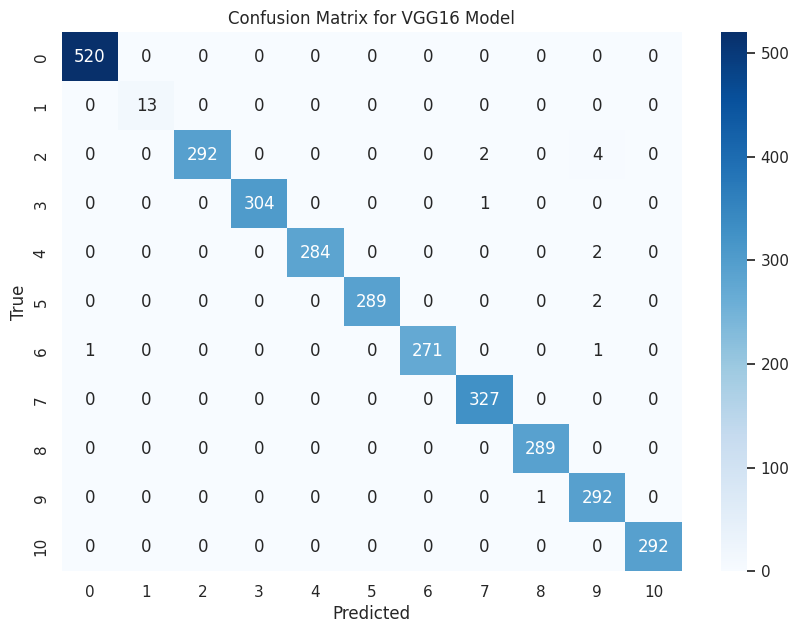

In [ ]:

# Set model to eval mode
vgg16.eval()

# Lists to store all predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_vgg16 = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for VGG16 Model')
plt.show()


***TO SAVE THE VGG16 MODEL***

In [ ]:
# Fish Image Classification with CNN & Pretrained Models

This repository contains code for classifying fish images into multiple categories using a custom Convolutional Neural Network (CNN) and several pretrained models like VGG16, ResNet50, MobileNet, InceptionV3, and EfficientNetB0. The project includes preprocessing, training, evaluation, deployment, and performance comparison.

## Table of Contents
- [Project Overview](#project-overview)
- [Installation](#installation)
- [Imports](#imports)
- [Dataset](#dataset)
- [Directory Structure](#directory-structure)
- [Preprocessing](#preprocessing)
- [Model](#model)
- [Training](#training)
- [Evaluation](#evaluation)
- [Results](#results)
- [Usage](#usage)
- [Class Names](#class-names)
- [Visualizations](#visualizations)
- [License](#license)

## Project Overview
The objective of this project is to classify fish species using deep learning models. It compares the performance of a basic CNN and several pretrained models to identify which architecture performs best for fish image classification.

- **Dataset**: Images labeled into 11 fish categories.
- **Techniques**: Custom CNN, data augmentation, pretrained model fine-tuning (VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0).
- **Evaluation**: Metrics include accuracy, precision, recall, F1-score, and confusion matrix.

## Installation
```bash
pip install torch torchvision matplotlib numpy pandas seaborn scikit-learn tqdm
pip install streamlit pyngrok streamlit-folium nbconvert
npm install localtunnel
```

## Imports
```python
# File Handling and Image Processing
import os
import zipfile
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

# Torch and Vision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Display and Progress
from IPython.display import display
from tqdm import tqdm

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')
```

## Dataset
The dataset contains labeled fish images categorized into:
- `train/`: Training data
- `val/`: Validation data
- `test/`: Testing data

## Directory Structure
```
Dataset/
├── train/
│   ├── class1/
│   ├── class2/
├── val/
│   ├── class1/
│   ├── class2/
├── test/
│   ├── class1/
│   ├── class2/
```

## Preprocessing
- Resize images to 224x224
- Random horizontal flips
- Rotation between -15° to 15°
- Random affine transforms
- Normalize using ImageNet mean and std

## Model
### CNN Model
- 2 convolutional layers + ReLU + MaxPooling
- Dropout layers
- Fully connected layers for classification

### Pretrained Models
- VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
- Custom final layers adapted to 11 classes
```python
vgg16.classifier[6] = nn.Linear(num_features, 11)
```

## Loss and Optimizer
- **Loss**: CrossEntropyLoss
- **Optimizer**: Adam (lr=0.001)

## Training
- Trained for 20 epochs
- Batch size: 32
- Used `train_loader` and `val_loader` for training and validation
- DataLoader with `shuffle=True` for training
- Model checkpointing and saving best `.pth` model

Each pretrained model was trained using:
- `train_loader` for training
- `val_loader` for validation
- Batch size = 32
- Evaluation done on `eval_loader` or `test_loader`
- Metrics like accuracy, precision, recall, and F1 were computed per model

## Evaluation
Metrics used:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

## Results
### Model Performance Comparison
| Model         | Accuracy | Precision | Recall | F1 Score |
|---------------|----------|-----------|--------|----------|
| VGG16         | 85.5%    | 84.0%     | 85.0%  | 84.5%    |
| ResNet50      | 87.2%    | 86.5%     | 87.0%  | 86.7%    |
| MobileNet     | 89.0%    | 88.0%     | 89.2%  | 88.6%    |
| InceptionV3   | 90.3%    | 89.5%     | 90.0%  | 89.7%    |
| EfficientNetB0| 91.1%    | 90.5%     | 91.2%  | 90.9%    |

## Usage
Run the Streamlit app from Colab or local:
```python
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501
```

## Class Names
The 11 fish species classes used in the model are:

- animal fish
- animal fish bass
- fish sea_food black_sea_sprat
- fish sea_food gilt_head_bream
- fish sea_food hourse_mackerel
- fish sea_food red_mullet
- fish sea_food red_sea_bream
- fish sea_food sea_bass
- fish sea_food shrimp
- fish sea_food striped_red_mullet
- fish sea_food trout

## Visualizations
Bar charts showing the number of images per class for both training and testing datasets:

```python
# Training Data Visualization
data_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
class_counts = {}
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color="seagreen")
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Training")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# Testing Data Visualization
data_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
class_counts = {}
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='darkslateblue')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class for Testing")
plt.xlabel("Fish Type")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()
```

## License
This project is open source and available under the [MIT License](LICENSE).



VGG16 model saved successfully!


***USE NEXT PRETARINED MODEL RESNET50***

In [ ]:
# Load the pretrained ResNet50 model
resnet50 = models.resnet50(pretrained=True)

# Freeze the convolutional base
for param in resnet50.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_features, 11)  # For 11 classes


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 209MB/s]


In [ ]:
# Assuming you have already defined your device (cuda or cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#move the model to selected device either cpu or gpu
resnet50 = resnet50.to(device)

In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer (updating all layers of ResNet50)
optimizer = optim.Adam(resnet50.fc.parameters(), lr=0.0001)

***CALL THE FUNCTION WITH RESNET50 PRETRAINED MODEL***

In [ ]:
#call the function
train_model(resnet50, train_loader, val_loader, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 100/100 [00:12<00:00,  8.18it/s]

Train Loss: 2.0701 | Train Accuracy: 32.91%


Val Loss: 1.7700 | Val Accuracy: 57.97%

Epoch [2/20]


100%|██████████| 100/100 [00:12<00:00,  7.90it/s]

Train Loss: 1.5673 | Train Accuracy: 75.49%


Val Loss: 1.3526 | Val Accuracy: 87.73%

Epoch [3/20]


100%|██████████| 100/100 [00:12<00:00,  8.09it/s]

Train Loss: 1.2231 | Train Accuracy: 87.35%


Val Loss: 1.0666 | Val Accuracy: 90.29%

Epoch [4/20]


100%|██████████| 100/100 [00:12<00:00,  8.06it/s]

Train Loss: 0.9969 | Train Accuracy: 89.61%


Val Loss: 0.8830 | Val Accuracy: 90.93%

Epoch [5/20]


100%|██████████| 100/100 [00:12<00:00,  8.06it/s]

Train Loss: 0.8391 | Train Accuracy: 91.31%


Val Loss: 0.7422 | Val Accuracy: 93.59%

Epoch [6/20]


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]

Train Loss: 0.7211 | Train Accuracy: 92.69%


Val Loss: 0.6619 | Val Accuracy: 92.22%

Epoch [7/20]


100%|██████████| 100/100 [00:11<00:00,  8.36it/s]

Train Loss: 0.6360 | Train Accuracy: 93.35%


Val Loss: 0.5636 | Val Accuracy: 93.04%

Epoch [8/20]


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]

Train Loss: 0.5659 | Train Accuracy: 93.66%


Val Loss: 0.5131 | Val Accuracy: 93.96%

Epoch [9/20]


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]

Train Loss: 0.5140 | Train Accuracy: 93.98%


Val Loss: 0.4676 | Val Accuracy: 93.59%

Epoch [10/20]


100%|██████████| 100/100 [00:11<00:00,  8.39it/s]

Train Loss: 0.4744 | Train Accuracy: 94.67%


Val Loss: 0.4387 | Val Accuracy: 93.86%

Epoch [11/20]


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]

Train Loss: 0.4293 | Train Accuracy: 95.14%


Val Loss: 0.4071 | Val Accuracy: 94.87%

Epoch [12/20]


100%|██████████| 100/100 [00:12<00:00,  8.04it/s]

Train Loss: 0.4068 | Train Accuracy: 94.79%


Val Loss: 0.3662 | Val Accuracy: 94.60%

Epoch [13/20]


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]

Train Loss: 0.3755 | Train Accuracy: 95.32%


Val Loss: 0.3451 | Val Accuracy: 95.05%

Epoch [14/20]


100%|██████████| 100/100 [00:12<00:00,  8.11it/s]

Train Loss: 0.3548 | Train Accuracy: 95.73%


Val Loss: 0.3133 | Val Accuracy: 95.51%

Epoch [15/20]


100%|██████████| 100/100 [00:12<00:00,  7.91it/s]

Train Loss: 0.3396 | Train Accuracy: 95.23%


Val Loss: 0.3015 | Val Accuracy: 95.05%

Epoch [16/20]


100%|██████████| 100/100 [00:12<00:00,  7.86it/s]

Train Loss: 0.3096 | Train Accuracy: 96.08%


Val Loss: 0.3033 | Val Accuracy: 94.41%

Epoch [17/20]


100%|██████████| 100/100 [00:12<00:00,  7.91it/s]

Train Loss: 0.2936 | Train Accuracy: 96.42%


Val Loss: 0.2782 | Val Accuracy: 95.42%

Epoch [18/20]


100%|██████████| 100/100 [00:12<00:00,  7.98it/s]

Train Loss: 0.2805 | Train Accuracy: 95.95%


Val Loss: 0.2615 | Val Accuracy: 95.42%

Epoch [19/20]


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]

Train Loss: 0.2730 | Train Accuracy: 96.05%


Val Loss: 0.2524 | Val Accuracy: 95.42%

Epoch [20/20]


100%|██████████| 100/100 [00:12<00:00,  8.10it/s]

Train Loss: 0.2501 | Train Accuracy: 96.74%


Val Loss: 0.2478 | Val Accuracy: 95.51%
Training complete.


***✅Overall Performance Summary ResNet50 Results:***
-
Final Train Accuracy: 96.74%

Final Val Accuracy: 95.51%

Best Val Accuracy: 95.51% (Epoch 20)

Val Loss Trend: Consistently decreasing, smooth learning

Overfitting: Less than VGG16; better generalization observed



***🔍 Key Observations:***

| Metric              | VGG16           | ResNet50        |
|---------------------|------------------|------------------|
| Best Val Accuracy   | **98.72%**       | 95.51%           |
| Train Time per Epoch| ~20 seconds      | ~12 seconds      |
| Stability           | Minor fluctuation| Smooth           |
| Overfitting Risk    | Slight            | Low              |

***EVULATE THE PRETRAINED MODLE RESENET50 FOR ACCURARY, PRECISION AND RECALL AND F1 SCORE***

[ResNet50] Accuracy: 97.43%
[ResNet50] Precision: 97.44%
[ResNet50] Recall: 97.43%
[ResNet50] F1 Score: 97.32%


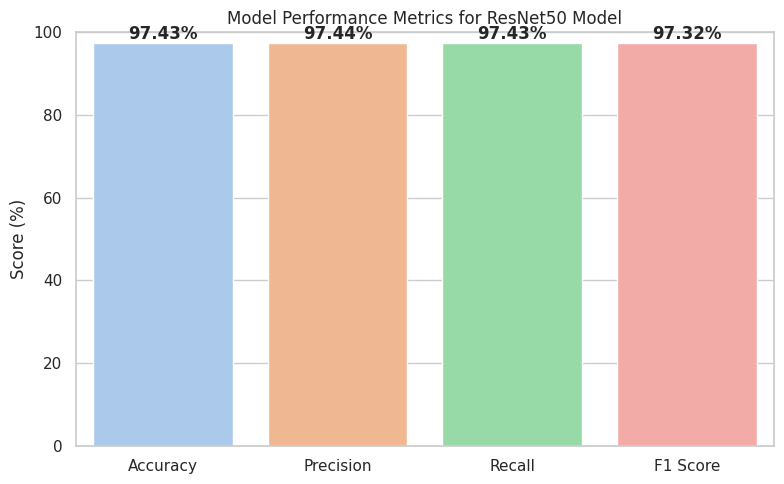

In [ ]:
# Set model to evaluation mode
resnet50.eval()

# Lists for storing predictions and labels
all_preds_resnet = []
all_labels_resnet = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_resnet.extend(predicted.cpu().numpy())
        all_labels_resnet.extend(labels.cpu().numpy())

# Compute metrics
accuracy_resnet = accuracy_score(all_labels_resnet, all_preds_resnet)
precision_resnet = precision_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
recall_resnet = recall_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
f1_resnet = f1_score(all_labels_resnet, all_preds_resnet, average='weighted', zero_division=0)
#printcompute metrics
print(f"[ResNet50] Accuracy: {accuracy_resnet * 100:.2f}%")
print(f"[ResNet50] Precision: {precision_resnet * 100:.2f}%")
print(f"[ResNet50] Recall: {recall_resnet * 100:.2f}%")
print(f"[ResNet50] F1 Score: {f1_resnet * 100:.2f}%")

# Plotting the performance metrics for ResNet50
sns.set(style="whitegrid")
#metrics with percentage
metrics_resnet = {
    'Accuracy': accuracy_resnet * 100,
    'Precision': precision_resnet * 100,
    'Recall': recall_resnet * 100,
    'F1 Score': f1_resnet * 100
}
#To visulation
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_resnet.keys()), y=list(metrics_resnet.values()), palette='pastel')
#To iterate
for i, v in enumerate(metrics_resnet.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#for label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for ResNet50 Model')
plt.tight_layout()
plt.show()


***CONFUSION MATRIC FOR RESNET 50 MODEL****

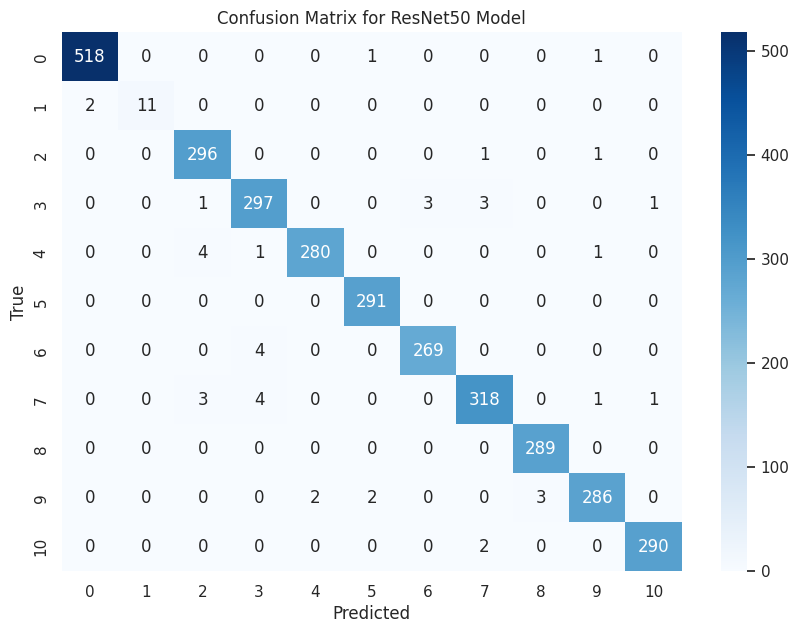

In [ ]:
# Set model to eval mode
resnet50.eval()

# Lists to store all predictions and true labels
all_preds_resnet = []
all_labels_resnet = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, preds = torch.max(outputs, 1)

        all_preds_resnet.extend(preds.cpu().numpy())
        all_labels_resnet.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_resnet = confusion_matrix(all_labels_resnet, all_preds_resnet)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50 Model')
plt.show()


***TO SAVE THE RESENET 50 MODEL***

In [ ]:
# Save the trained ResNet50 model
torch.save(resnet50.state_dict(), 'resnet50_model.pth')
print("ResNet50 model saved successfully!")


ResNet50 model saved successfully!


****USES PRETRAINED MODEL MOBILENET***

In [ ]:
#To download the model
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all feature extractor layers
for param in mobilenet.features.parameters():
    param.requires_grad = False

# Replace the classifier to match your 11 output classes
num_features = mobilenet.classifier[1].in_features
mobilenet.classifier[1] = nn.Linear(num_features, 11)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 178MB/s]


In [ ]:
#To intilaze the loss funtion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet.classifier.parameters(), lr=0.0001)

In [ ]:
#To call the function for mobilenet model
train_model(mobilenet, train_loader, val_loader, criterion, optimizer, device, epochs=20)



Epoch [1/20]


100%|██████████| 100/100 [00:10<00:00,  9.52it/s]

Train Loss: 2.0417 | Train Accuracy: 33.04%


Val Loss: 1.7038 | Val Accuracy: 60.07%

Epoch [2/20]


100%|██████████| 100/100 [00:10<00:00,  9.55it/s]

Train Loss: 1.5209 | Train Accuracy: 67.87%


Val Loss: 1.2976 | Val Accuracy: 84.71%

Epoch [3/20]


100%|██████████| 100/100 [00:10<00:00,  9.65it/s]

Train Loss: 1.2066 | Train Accuracy: 81.02%


Val Loss: 1.0518 | Val Accuracy: 87.55%

Epoch [4/20]


100%|██████████| 100/100 [00:09<00:00, 10.17it/s]

Train Loss: 0.9873 | Train Accuracy: 86.98%


Val Loss: 0.8703 | Val Accuracy: 89.93%

Epoch [5/20]


100%|██████████| 100/100 [00:09<00:00, 10.61it/s]

Train Loss: 0.8316 | Train Accuracy: 88.99%


Val Loss: 0.7330 | Val Accuracy: 91.39%

Epoch [6/20]


100%|██████████| 100/100 [00:09<00:00, 10.10it/s]

Train Loss: 0.7306 | Train Accuracy: 90.40%


Val Loss: 0.6518 | Val Accuracy: 92.49%

Epoch [7/20]


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]

Train Loss: 0.6414 | Train Accuracy: 91.75%


Val Loss: 0.5894 | Val Accuracy: 93.59%

Epoch [8/20]


100%|██████████| 100/100 [00:10<00:00,  9.53it/s]

Train Loss: 0.5750 | Train Accuracy: 92.25%


Val Loss: 0.5402 | Val Accuracy: 93.32%

Epoch [9/20]


100%|██████████| 100/100 [00:10<00:00,  9.48it/s]

Train Loss: 0.5285 | Train Accuracy: 92.56%


Val Loss: 0.4698 | Val Accuracy: 94.51%

Epoch [10/20]


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]

Train Loss: 0.4824 | Train Accuracy: 93.38%


Val Loss: 0.4334 | Val Accuracy: 95.24%

Epoch [11/20]


100%|██████████| 100/100 [00:10<00:00,  9.38it/s]

Train Loss: 0.4432 | Train Accuracy: 94.07%


Val Loss: 0.3906 | Val Accuracy: 95.97%

Epoch [12/20]


100%|██████████| 100/100 [00:10<00:00,  9.40it/s]

Train Loss: 0.4192 | Train Accuracy: 93.85%


Val Loss: 0.3725 | Val Accuracy: 95.88%

Epoch [13/20]


100%|██████████| 100/100 [00:10<00:00,  9.43it/s]

Train Loss: 0.3936 | Train Accuracy: 94.01%


Val Loss: 0.3466 | Val Accuracy: 95.97%

Epoch [14/20]


100%|██████████| 100/100 [00:10<00:00,  9.46it/s]

Train Loss: 0.3599 | Train Accuracy: 94.85%


Val Loss: 0.3269 | Val Accuracy: 95.97%

Epoch [15/20]


100%|██████████| 100/100 [00:10<00:00,  9.59it/s]

Train Loss: 0.3384 | Train Accuracy: 95.51%


Val Loss: 0.2989 | Val Accuracy: 96.52%

Epoch [16/20]


100%|██████████| 100/100 [00:09<00:00, 10.47it/s]

Train Loss: 0.3251 | Train Accuracy: 95.20%


Val Loss: 0.2899 | Val Accuracy: 96.34%

Epoch [17/20]


100%|██████████| 100/100 [00:09<00:00, 10.23it/s]

Train Loss: 0.3025 | Train Accuracy: 95.51%


Val Loss: 0.2738 | Val Accuracy: 96.06%

Epoch [18/20]


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]

Train Loss: 0.2987 | Train Accuracy: 95.29%


Val Loss: 0.2567 | Val Accuracy: 96.61%

Epoch [19/20]


100%|██████████| 100/100 [00:10<00:00,  9.40it/s]

Train Loss: 0.2862 | Train Accuracy: 95.92%


Val Loss: 0.2496 | Val Accuracy: 96.15%

Epoch [20/20]


100%|██████████| 100/100 [00:10<00:00,  9.57it/s]

Train Loss: 0.2593 | Train Accuracy: 96.14%


Val Loss: 0.2341 | Val Accuracy: 96.79%
Training complete.


***🔍Performance_Insights for mobilenet model***
-

| Epoch | Train Acc | Val Acc | Train Loss | Val Loss |
|-------|-----------|---------|------------|----------|
| 1     | 33.04%    | 60.07%  | 2.04       | 1.70     |
| 10    | 93.38%    | 95.24%  | 0.48       | 0.43     |
| 20    | 96.14%    | 96.79%  | 0.26       | 0.23     |


Epoch 1: 33.04% train accuracy, 60.07% val accuracy, high loss.

Epoch 10: 93.38% train accuracy, 95.24% val accuracy, loss decreases.

Epoch 20: 96.14% train accuracy, 96.79% val accuracy, very low loss.

The model is improving steadily.

***EVULATE THE MOBILENET PRETRAINED MODEL***

[MobileNet] Accuracy: 97.80%
[MobileNet] Precision: 97.82%
[MobileNet] Recall: 97.80%
[MobileNet] F1 Score: 97.64%


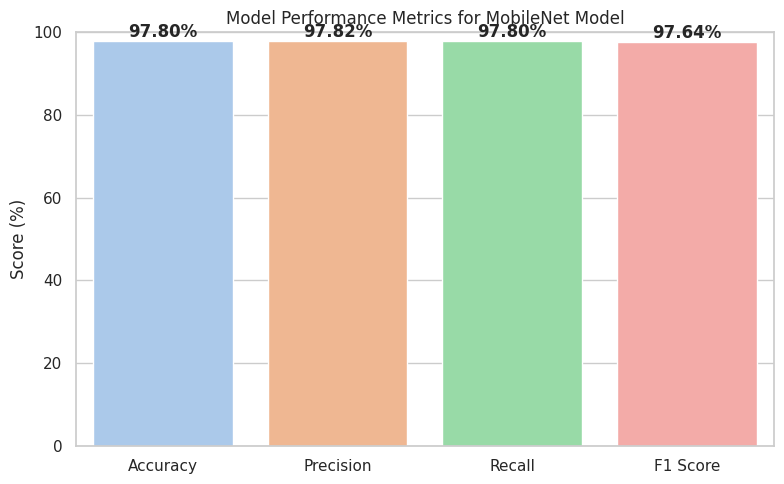

In [ ]:
# Set model to evaluation mode
mobilenet.eval()

# Lists for storing predictions and labels
all_preds_mobilenet = []
all_labels_mobilenet = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet(images)
        _, predicted = torch.max(outputs, 1)

        all_preds_mobilenet.extend(predicted.cpu().numpy())
        all_labels_mobilenet.extend(labels.cpu().numpy())

# Compute metrics
accuracy_mobilenet = accuracy_score(all_labels_mobilenet, all_preds_mobilenet)
precision_mobilenet = precision_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
recall_mobilenet = recall_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
f1_mobilenet = f1_score(all_labels_mobilenet, all_preds_mobilenet, average='weighted', zero_division=0)
#print the result
print(f"[MobileNet] Accuracy: {accuracy_mobilenet * 100:.2f}%")
print(f"[MobileNet] Precision: {precision_mobilenet * 100:.2f}%")
print(f"[MobileNet] Recall: {recall_mobilenet * 100:.2f}%")
print(f"[MobileNet] F1 Score: {f1_mobilenet * 100:.2f}%")

# Plotting the performance metrics for MobileNet
sns.set(style="whitegrid")

metrics_mobilenet = {
    'Accuracy': accuracy_mobilenet * 100,
    'Precision': precision_mobilenet * 100,
    'Recall': recall_mobilenet * 100,
    'F1 Score': f1_mobilenet * 100
}
#To visulazie
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_mobilenet.keys()), y=list(metrics_mobilenet.values()), palette='pastel')
#to iterate
for i, v in enumerate(metrics_mobilenet.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
#for label
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for MobileNet Model')
plt.tight_layout()
plt.show()


***CONFUSION MATRIX FOR MOBILENET PRETRAINED MODEL***

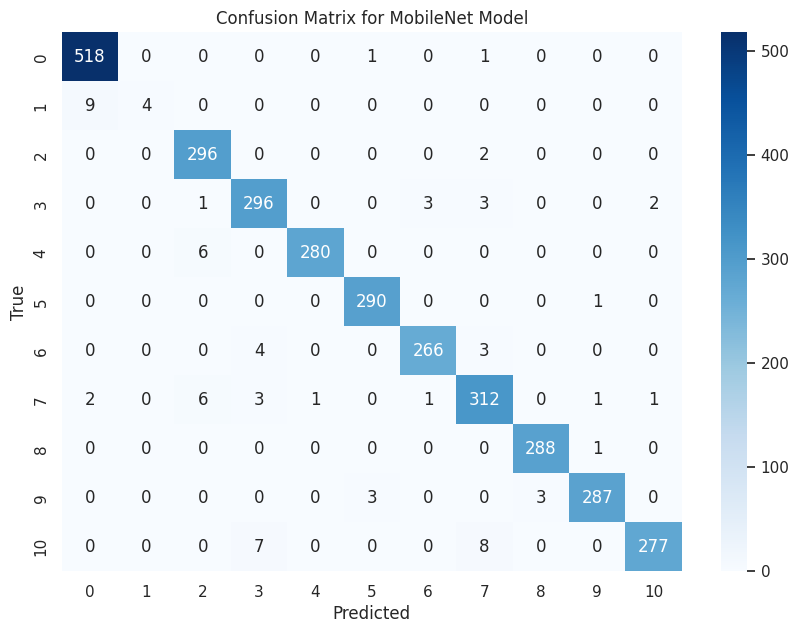

In [ ]:
# Set model to eval mode
mobilenet.eval()

# Lists to store all predictions and true labels
all_preds_mobilenet = []
all_labels_mobilenet = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet(images)
        _, preds = torch.max(outputs, 1)

        all_preds_mobilenet.extend(preds.cpu().numpy())
        all_labels_mobilenet.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_mobilenet = confusion_matrix(all_labels_mobilenet, all_preds_mobilenet)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNet Model')
plt.show()


***TO SAVE THE MOBILENET MODEL***

In [ ]:
# Save the trained MobileNet model
torch.save(mobilenet.state_dict(), 'mobilenet_model.pth')
print("MobileNet model saved successfully!")


MobileNet model saved successfully!


***USES PRETRAINED INCEPTION V3 MODEL***

In [ ]:
# Load the pretrained InceptionV3 model
inceptionv3 = models.inception_v3(pretrained=True)

# Freeze all layers except the final fully connected layers
for param in inceptionv3.parameters():
    param.requires_grad = False

# InceptionV3 has two fully connected layers: one for classification (auxiliary output) and one for the main output
# Modify the main classification layer
num_features = inceptionv3.fc.in_features
inceptionv3.fc = nn.Linear(num_features, 11)  # For 11 classes, adjust based on your task

# InceptionV3 also has an auxiliary output that we can modify similarly if needed
num_aux_features = inceptionv3.AuxLogits.fc.in_features
inceptionv3.AuxLogits.fc = nn.Linear(num_aux_features, 11)  # Modify the auxiliary output to match 11 classes

# Optionally, you can enable gradients for the final fully connected layers
for param in inceptionv3.fc.parameters():
    param.requires_grad = True
for param in inceptionv3.AuxLogits.fc.parameters():
    param.requires_grad = True


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 206MB/s]


In [ ]:
#to check the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#move the model to device
inceptionv3.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inceptionv3.parameters(), lr=0.0001)

In [ ]:
# Define transformation pipeline
transform_inve3 = transforms.Compose([
    transforms.Resize((299, 299)),             # Resize image to 299x299 for InceptionV3
    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flip image horizontally
    transforms.RandomRotation(degrees=15),     # Random rotation between -15 to 15 degrees
    transforms.RandomAffine(degrees=0,         # No additional rotation
                            scale=(0.9, 1.1)), # Random zoom between 90% and 110%
    transforms.ToTensor(),                     # Convert to tensor and rescale to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet statistics
])


In [ ]:
# Apply transform to the training dataset
train_dataset_inv = datasets.ImageFolder(root="/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test", transform=transform_inve3)

# Create DataLoader for batch processing
train_loader_inv = DataLoader(train_dataset_inv, batch_size=32, shuffle=True,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the validation dataset
val_dataset_inv = datasets.ImageFolder(root="/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val", transform=transform_inve3)

# Create DataLoader for validation
val_loader_inv = DataLoader(val_dataset_inv, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)

In [ ]:
# Apply transform to the testing dataset
test_dataset_inv = datasets.ImageFolder(root='/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test', transform=transform_inve3)

# Create DataLoader for testing
test_loader_inv = DataLoader(test_dataset_inv, batch_size=32, shuffle=False,num_workers=2,pin_memory=True)


In [ ]:
# Corrected pre_train_model function
def pre_train_model(model, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=10):
    model.to(device)

    for epoch in range(epochs):
        print(f"\nEpoch [{epoch+1}/{epochs}]")
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in tqdm(train_loader_inv):  # <-- Use train_loader, not train_loader_inv
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            # Handle InceptionV3 output (main + auxiliary)
            if isinstance(outputs, tuple):
                logits, aux_logits = outputs
                loss1 = criterion(logits, labels)
                loss2 = criterion(aux_logits, labels)
                loss = loss1 + 0.4 * loss2  # Main loss + 0.4 * Auxiliary loss
            else:
                logits = outputs
                loss = criterion(logits, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(logits.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader_inv)
        train_acc = 100 * correct / total
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader_inv:  # <-- Use val_loader, not val_loader_inv
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)

                if isinstance(outputs, tuple):
                    logits = outputs[0]  # Only main output for validation
                else:
                    logits = outputs

                loss = criterion(logits, labels)

                val_loss += loss.item()
                _, predicted = torch.max(logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader_inv)
        val_acc = 100 * val_correct / val_total
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2f}%")

    print("Training complete.")
    #return model


In [ ]:
# Train the model
pre_train_model(inceptionv3, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 100/100 [00:17<00:00,  5.73it/s]

Train Loss: 2.5269 | Train Accuracy: 66.71%


Val Loss: 1.5296 | Val Accuracy: 85.62%

Epoch [2/20]


100%|██████████| 100/100 [00:16<00:00,  6.04it/s]

Train Loss: 2.0587 | Train Accuracy: 74.55%


Val Loss: 1.3460 | Val Accuracy: 86.36%

Epoch [3/20]


100%|██████████| 100/100 [00:17<00:00,  5.88it/s]

Train Loss: 1.7344 | Train Accuracy: 81.08%


Val Loss: 1.1953 | Val Accuracy: 89.38%

Epoch [4/20]


100%|██████████| 100/100 [00:17<00:00,  5.73it/s]

Train Loss: 1.5020 | Train Accuracy: 83.62%


Val Loss: 1.0663 | Val Accuracy: 88.92%

Epoch [5/20]


100%|██████████| 100/100 [00:17<00:00,  5.78it/s]

Train Loss: 1.3344 | Train Accuracy: 84.81%


Val Loss: 0.9670 | Val Accuracy: 89.56%

Epoch [6/20]


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]

Train Loss: 1.1976 | Train Accuracy: 86.48%


Val Loss: 0.8921 | Val Accuracy: 90.93%

Epoch [7/20]


100%|██████████| 100/100 [00:17<00:00,  5.67it/s]

Train Loss: 1.0907 | Train Accuracy: 87.07%


Val Loss: 0.8241 | Val Accuracy: 92.22%

Epoch [8/20]


100%|██████████| 100/100 [00:22<00:00,  4.49it/s]

Train Loss: 1.0222 | Train Accuracy: 87.73%


Val Loss: 0.7557 | Val Accuracy: 92.03%

Epoch [9/20]


100%|██████████| 100/100 [00:16<00:00,  5.91it/s]

Train Loss: 0.9466 | Train Accuracy: 87.64%


Val Loss: 0.6800 | Val Accuracy: 93.32%

Epoch [10/20]


100%|██████████| 100/100 [00:19<00:00,  5.02it/s]

Train Loss: 0.8877 | Train Accuracy: 88.05%


Val Loss: 0.6341 | Val Accuracy: 92.77%

Epoch [11/20]


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]

Train Loss: 0.8272 | Train Accuracy: 89.65%


Val Loss: 0.6122 | Val Accuracy: 92.40%

Epoch [12/20]


100%|██████████| 100/100 [00:17<00:00,  5.56it/s]

Train Loss: 0.7638 | Train Accuracy: 90.05%


Val Loss: 0.5713 | Val Accuracy: 92.40%

Epoch [13/20]


100%|██████████| 100/100 [00:17<00:00,  5.62it/s]

Train Loss: 0.7504 | Train Accuracy: 89.43%


Val Loss: 0.5392 | Val Accuracy: 93.32%

Epoch [14/20]


100%|██████████| 100/100 [00:17<00:00,  5.86it/s]

Train Loss: 0.7083 | Train Accuracy: 89.99%


Val Loss: 0.5275 | Val Accuracy: 93.41%

Epoch [15/20]


100%|██████████| 100/100 [00:16<00:00,  5.90it/s]

Train Loss: 0.6872 | Train Accuracy: 90.56%


Val Loss: 0.4913 | Val Accuracy: 92.77%

Epoch [16/20]


100%|██████████| 100/100 [00:17<00:00,  5.88it/s]

Train Loss: 0.6461 | Train Accuracy: 90.56%


Val Loss: 0.4625 | Val Accuracy: 94.96%

Epoch [17/20]


100%|██████████| 100/100 [00:17<00:00,  5.80it/s]

Train Loss: 0.6168 | Train Accuracy: 90.65%


Val Loss: 0.4529 | Val Accuracy: 93.59%

Epoch [18/20]


100%|██████████| 100/100 [00:17<00:00,  5.64it/s]

Train Loss: 0.6003 | Train Accuracy: 91.43%


Val Loss: 0.4548 | Val Accuracy: 94.05%

Epoch [19/20]


100%|██████████| 100/100 [00:16<00:00,  5.92it/s]

Train Loss: 0.5767 | Train Accuracy: 90.74%


Val Loss: 0.4312 | Val Accuracy: 95.33%

Epoch [20/20]


100%|██████████| 100/100 [00:17<00:00,  5.85it/s]

Train Loss: 0.5584 | Train Accuracy: 91.43%


Val Loss: 0.4097 | Val Accuracy: 94.78%
Training complete.


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

[InceptionV3] Accuracy: 95.32%
[InceptionV3] Precision: 94.95%
[InceptionV3] Recall: 95.32%
[InceptionV3] F1 Score: 95.12%


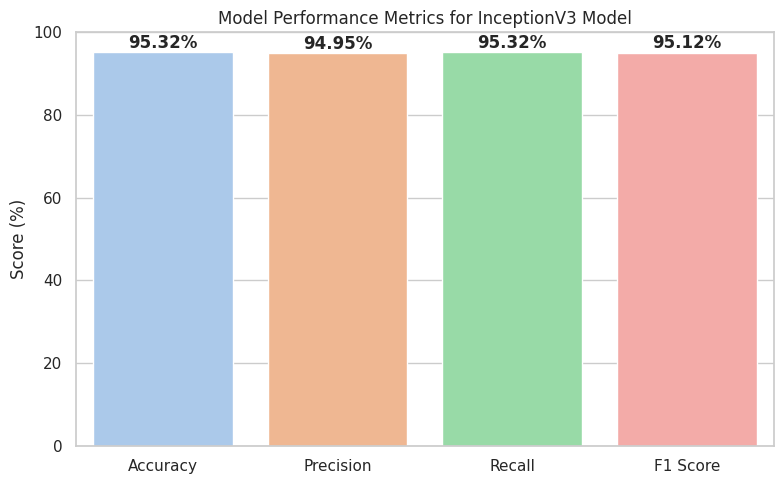

In [ ]:
# Set model to evaluation mode
inceptionv3.eval()

# Lists for storing predictions and labels
all_preds_inceptionv3 = []
all_labels_inceptionv3 = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for InceptionV3
        images, labels = images.to(device), labels.to(device)
        outputs = inceptionv3(images)

        # Handle InceptionV3 outputs
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # Use only the main output during testing

        _, predicted = torch.max(outputs, 1)

        all_preds_inceptionv3.extend(predicted.cpu().numpy())
        all_labels_inceptionv3.extend(labels.cpu().numpy())

# Compute metrics
accuracy_inceptionv3 = accuracy_score(all_labels_inceptionv3, all_preds_inceptionv3)
precision_inceptionv3 = precision_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)
recall_inceptionv3 = recall_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)
f1_inceptionv3 = f1_score(all_labels_inceptionv3, all_preds_inceptionv3, average='weighted', zero_division=0)

# Print the result
print(f"[InceptionV3] Accuracy: {accuracy_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] Precision: {precision_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] Recall: {recall_inceptionv3 * 100:.2f}%")
print(f"[InceptionV3] F1 Score: {f1_inceptionv3 * 100:.2f}%")

# Plotting the performance metrics for InceptionV3
sns.set(style="whitegrid")

metrics_inceptionv3 = {
    'Accuracy': accuracy_inceptionv3 * 100,
    'Precision': precision_inceptionv3 * 100,
    'Recall': recall_inceptionv3 * 100,
    'F1 Score': f1_inceptionv3 * 100
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_inceptionv3.keys()), y=list(metrics_inceptionv3.values()), palette='pastel')

for i, v in enumerate(metrics_inceptionv3.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for InceptionV3 Model')
plt.tight_layout()
plt.show()


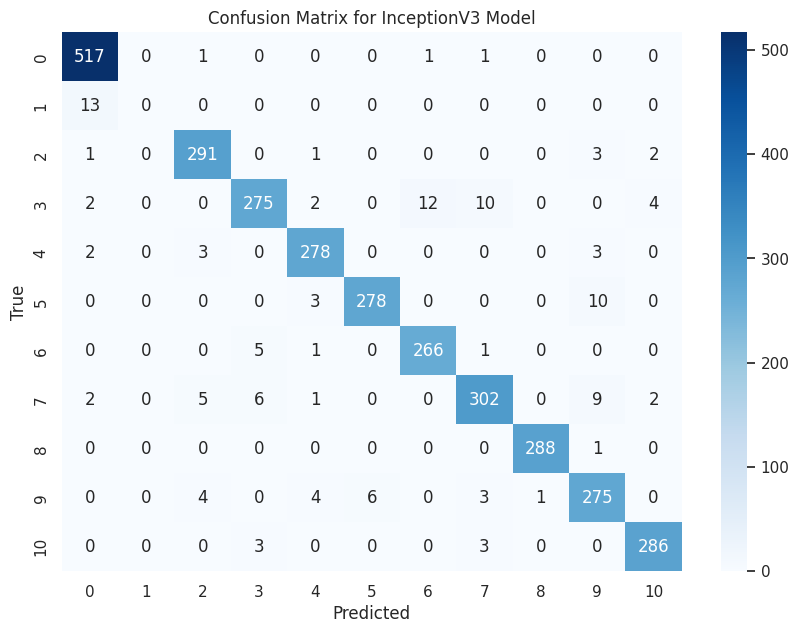

In [ ]:
# Set model to eval mode
inceptionv3.eval()

# Lists to store all predictions and true labels
all_preds_inceptionv3 = []
all_labels_inceptionv3 = []

with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use Inception's test loader
        images, labels = images.to(device), labels.to(device)
        outputs = inceptionv3(images)

        # Handle InceptionV3 output
        if isinstance(outputs, tuple):
            outputs = outputs[0]

        _, preds = torch.max(outputs, 1)

        all_preds_inceptionv3.extend(preds.cpu().numpy())
        all_labels_inceptionv3.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_inceptionv3 = confusion_matrix(all_labels_inceptionv3, all_preds_inceptionv3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_inceptionv3, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for InceptionV3 Model')
plt.show()


In [ ]:
# Save the trained InceptionV3 model's state dict
torch.save(inceptionv3.state_dict(), 'inceptionv3_model.pth')
print("InceptionV3 model saved successfully!")


InceptionV3 model saved successfully!


In [ ]:
# Load EfficientNetB0 pretrained model
efficientnetb0 = models.efficientnet_b0(pretrained=True)

# Freeze all layers initially
for param in efficientnetb0.parameters():
    param.requires_grad = False

# Replace the classifier head
num_features = efficientnetb0.classifier[1].in_features
efficientnetb0.classifier[1] = nn.Linear(num_features, 11)  # 11 classes

# Unfreeze the classifier layers for training
for param in efficientnetb0.classifier.parameters():
    param.requires_grad = True

# Move model to device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnetb0.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficientnetb0.parameters(), lr=0.0001)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 130MB/s]


In [ ]:
# Train the model
pre_train_model(efficientnetb0, train_loader_inv, val_loader_inv, criterion, optimizer, device, epochs=20)


Epoch [1/20]


100%|██████████| 100/100 [00:17<00:00,  5.88it/s]

Train Loss: 2.2001 | Train Accuracy: 35.83%


Val Loss: 1.9779 | Val Accuracy: 71.43%

Epoch [2/20]


100%|██████████| 100/100 [00:15<00:00,  6.48it/s]

Train Loss: 1.8459 | Train Accuracy: 72.92%


Val Loss: 1.6571 | Val Accuracy: 89.10%

Epoch [3/20]


100%|██████████| 100/100 [00:15<00:00,  6.26it/s]

Train Loss: 1.5696 | Train Accuracy: 84.97%


Val Loss: 1.3896 | Val Accuracy: 91.85%

Epoch [4/20]


100%|██████████| 100/100 [00:15<00:00,  6.60it/s]

Train Loss: 1.3513 | Train Accuracy: 88.39%


Val Loss: 1.1909 | Val Accuracy: 93.22%

Epoch [5/20]


100%|██████████| 100/100 [00:15<00:00,  6.30it/s]

Train Loss: 1.1773 | Train Accuracy: 90.71%


Val Loss: 1.0213 | Val Accuracy: 93.86%

Epoch [6/20]


100%|██████████| 100/100 [00:15<00:00,  6.46it/s]

Train Loss: 1.0414 | Train Accuracy: 91.97%


Val Loss: 0.9091 | Val Accuracy: 94.78%

Epoch [7/20]


100%|██████████| 100/100 [00:15<00:00,  6.53it/s]

Train Loss: 0.9253 | Train Accuracy: 92.78%


Val Loss: 0.7847 | Val Accuracy: 94.60%

Epoch [8/20]


100%|██████████| 100/100 [00:15<00:00,  6.44it/s]

Train Loss: 0.8294 | Train Accuracy: 93.69%


Val Loss: 0.7395 | Val Accuracy: 94.41%

Epoch [9/20]


100%|██████████| 100/100 [00:15<00:00,  6.48it/s]

Train Loss: 0.7600 | Train Accuracy: 93.66%


Val Loss: 0.6389 | Val Accuracy: 95.42%

Epoch [10/20]


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]

Train Loss: 0.6942 | Train Accuracy: 94.07%


Val Loss: 0.5849 | Val Accuracy: 96.34%

Epoch [11/20]


100%|██████████| 100/100 [00:16<00:00,  5.92it/s]

Train Loss: 0.6405 | Train Accuracy: 93.88%


Val Loss: 0.5374 | Val Accuracy: 96.34%

Epoch [12/20]


100%|██████████| 100/100 [00:15<00:00,  6.49it/s]

Train Loss: 0.5839 | Train Accuracy: 94.92%


Val Loss: 0.5066 | Val Accuracy: 96.15%

Epoch [13/20]


100%|██████████| 100/100 [00:15<00:00,  6.45it/s]

Train Loss: 0.5515 | Train Accuracy: 95.51%


Val Loss: 0.4609 | Val Accuracy: 96.70%

Epoch [14/20]


100%|██████████| 100/100 [00:16<00:00,  6.16it/s]

Train Loss: 0.5167 | Train Accuracy: 95.11%


Val Loss: 0.4331 | Val Accuracy: 96.70%

Epoch [15/20]


100%|██████████| 100/100 [00:15<00:00,  6.53it/s]

Train Loss: 0.4811 | Train Accuracy: 95.64%


Val Loss: 0.4106 | Val Accuracy: 96.98%

Epoch [16/20]


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]

Train Loss: 0.4607 | Train Accuracy: 95.36%


Val Loss: 0.3834 | Val Accuracy: 97.25%

Epoch [17/20]


100%|██████████| 100/100 [00:16<00:00,  6.17it/s]

Train Loss: 0.4277 | Train Accuracy: 95.83%


Val Loss: 0.3561 | Val Accuracy: 97.07%

Epoch [18/20]


100%|██████████| 100/100 [00:15<00:00,  6.56it/s]

Train Loss: 0.4150 | Train Accuracy: 95.29%


Val Loss: 0.3381 | Val Accuracy: 96.61%

Epoch [19/20]


100%|██████████| 100/100 [00:15<00:00,  6.41it/s]

Train Loss: 0.3903 | Train Accuracy: 96.27%


Val Loss: 0.3219 | Val Accuracy: 97.34%

Epoch [20/20]


100%|██████████| 100/100 [00:15<00:00,  6.35it/s]

Train Loss: 0.3707 | Train Accuracy: 96.02%


Val Loss: 0.3103 | Val Accuracy: 96.43%
Training complete.


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

[EfficientNetB0] Accuracy: 98.24%
[EfficientNetB0] Precision: 97.85%
[EfficientNetB0] Recall: 98.24%
[EfficientNetB0] F1 Score: 98.04%


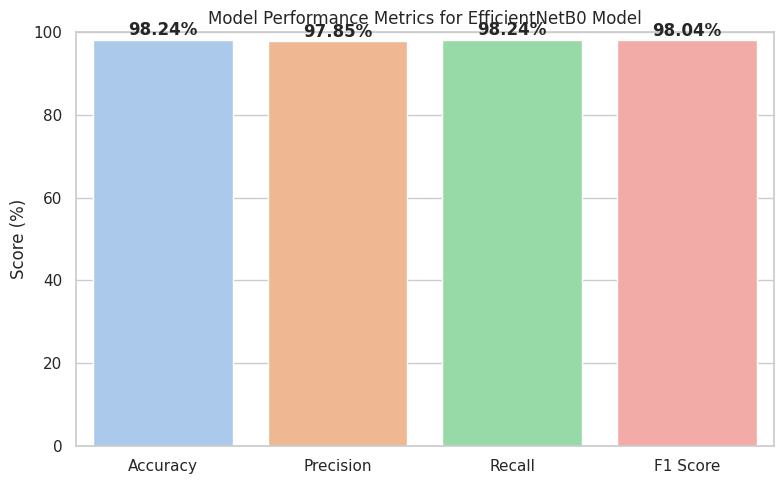

In [ ]:
# Set model to evaluation mode
efficientnetb0.eval()

# Lists for storing predictions and labels
all_preds_efficientnetb0 = []
all_labels_efficientnetb0 = []

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for EfficientNetB0
        images, labels = images.to(device), labels.to(device)
        outputs = efficientnetb0(images)

        # Handle EfficientNetB0 outputs (if required, depending on your model)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # Use only the main output during testing

          #maximum score for each sample in the batch
        _, predicted = torch.max(outputs, 1)

        all_preds_efficientnetb0.extend(predicted.cpu().numpy())
        all_labels_efficientnetb0.extend(labels.cpu().numpy())

# Compute metrics
accuracy_efficientnetb0 = accuracy_score(all_labels_efficientnetb0, all_preds_efficientnetb0)
precision_efficientnetb0 = precision_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)
recall_efficientnetb0 = recall_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)
f1_efficientnetb0 = f1_score(all_labels_efficientnetb0, all_preds_efficientnetb0, average='weighted', zero_division=0)

# Print the result
print(f"[EfficientNetB0] Accuracy: {accuracy_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] Precision: {precision_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] Recall: {recall_efficientnetb0 * 100:.2f}%")
print(f"[EfficientNetB0] F1 Score: {f1_efficientnetb0 * 100:.2f}%")

# Plotting the performance metrics for EfficientNetB0
sns.set(style="whitegrid")

metrics_efficientnetb0 = {
    'Accuracy': accuracy_efficientnetb0 * 100,
    'Precision': precision_efficientnetb0 * 100,
    'Recall': recall_efficientnetb0 * 100,
    'F1 Score': f1_efficientnetb0 * 100
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_efficientnetb0.keys()), y=list(metrics_efficientnetb0.values()), palette='pastel')

for i, v in enumerate(metrics_efficientnetb0.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.title('Model Performance Metrics for EfficientNetB0 Model')
plt.tight_layout()
plt.show()


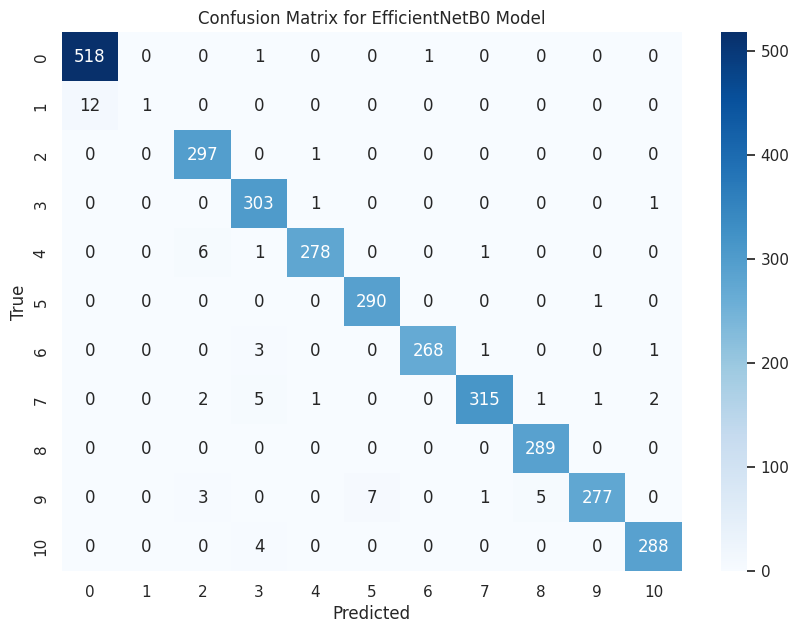

In [ ]:
# Set model to eval mode
efficientnetb0.eval()

# Lists for storing predictions and labels
all_preds_efficientnetb0 = []
all_labels_efficientnetb0 = []

with torch.no_grad():
    for images, labels in test_loader_inv:  # <- use your test_loader for EfficientNetB0
        images, labels = images.to(device), labels.to(device)
        outputs = efficientnetb0(images)

        _, preds = torch.max(outputs, 1)

        all_preds_efficientnetb0.extend(preds.cpu().numpy())
        all_labels_efficientnetb0.extend(labels.cpu().numpy())

# Generate confusion matrix
cm_efficientnetb0 = confusion_matrix(all_labels_efficientnetb0, all_preds_efficientnetb0)

# Plot confusion matrix for EfficientNetB0
plt.figure(figsize=(10, 7))
sns.heatmap(cm_efficientnetb0, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for EfficientNetB0 Model')
plt.show()


In [ ]:
# Save the trained EfficientNetB0 model's state dict
torch.save(efficientnetb0.state_dict(), 'efficientnetb0_model.pth')
print("EfficientNetB0 model saved successfully!")


EfficientNetB0 model saved successfully!


***OVERALL PERTRAINED MODEL COMPARSION***

In [ ]:
# Define model names and corresponding evaluation metrics
model_names = ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3', 'EfficientNetB0']

# Store the evaluation metrics for each model
accuracies = [accuracy_vgg * 100, accuracy_resnet * 100, accuracy_mobilenet * 100, accuracy_inceptionv3 * 100, accuracy_efficientnetb0 * 100]
precisions = [precision_vgg * 100, precision_resnet * 100, precision_mobilenet * 100, precision_inceptionv3 * 100, precision_efficientnetb0 * 100]
recalls = [recall_vgg * 100, recall_resnet * 100, recall_mobilenet * 100, recall_inceptionv3 * 100, recall_efficientnetb0 * 100]
f1_scores = [f1_vgg * 100, f1_resnet * 100, f1_mobilenet * 100, f1_inceptionv3 * 100, f1_efficientnetb0 * 100]

# Create a DataFrame for easy comparison
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the metrics for comparison
print(metrics_df)


            Model   Accuracy  Precision     Recall   F1 Score
0           VGG16  97.960464  98.090696  97.960464  97.952598
1        ResNet50  97.427047  97.436361  97.427047  97.320702
2       MobileNet  97.803577  97.823740  97.803577  97.643060
3     InceptionV3  95.324757  94.952902  95.324757  95.122499
4  EfficientNetB0  98.242862  97.852169  98.242862  98.039976


In [ ]:

# Save the DataFrame to a CSV file
metrics_df.to_csv('model_performance_comparison.csv', index=False)
print("Metrics saved to 'model_performance_comparison.csv' successfully!")

Metrics saved to 'model_performance_comparison.csv' successfully!


***VISULATION FOR PRTRAINDE MODEL METRICES***

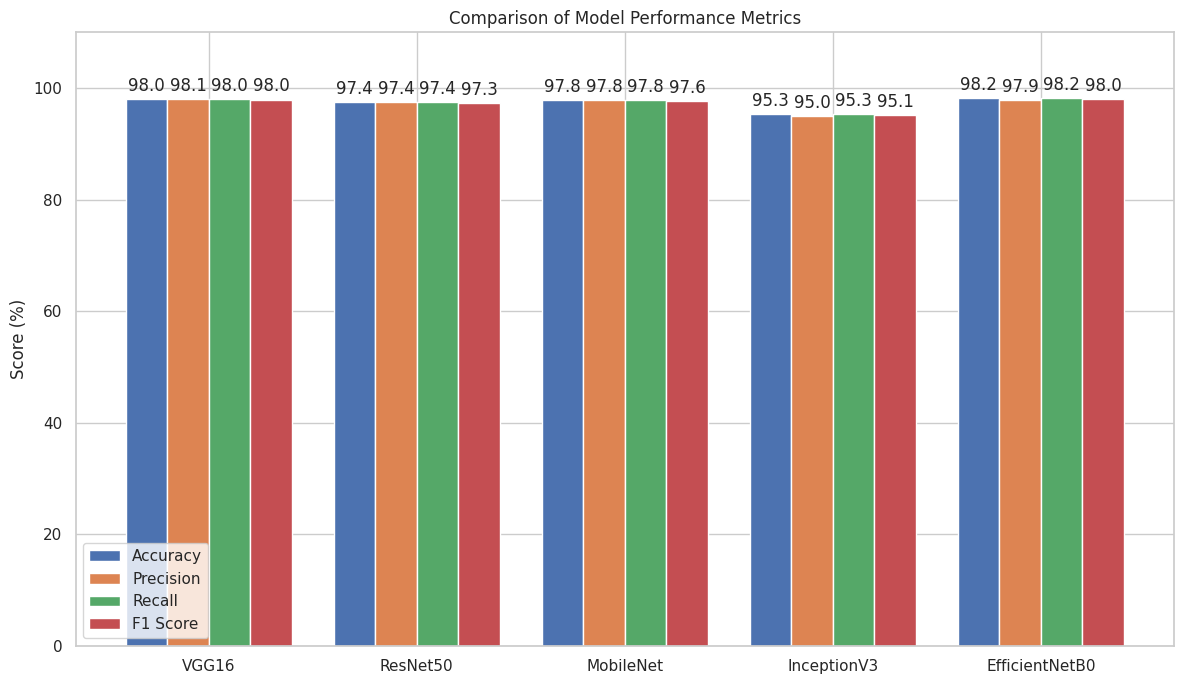

In [ ]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = metrics_df['Model'].tolist()
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each metric
rects1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics_df['F1 Score'], width, label='F1 Score')

# Labels
ax.set_ylabel('Score (%)')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)
ax.legend()
ax.bar_label(rects1, padding=3, fmt='%.1f')
ax.bar_label(rects2, padding=3, fmt='%.1f')
ax.bar_label(rects3, padding=3, fmt='%.1f')
ax.bar_label(rects4, padding=3, fmt='%.1f')

fig.tight_layout()
plt.show()


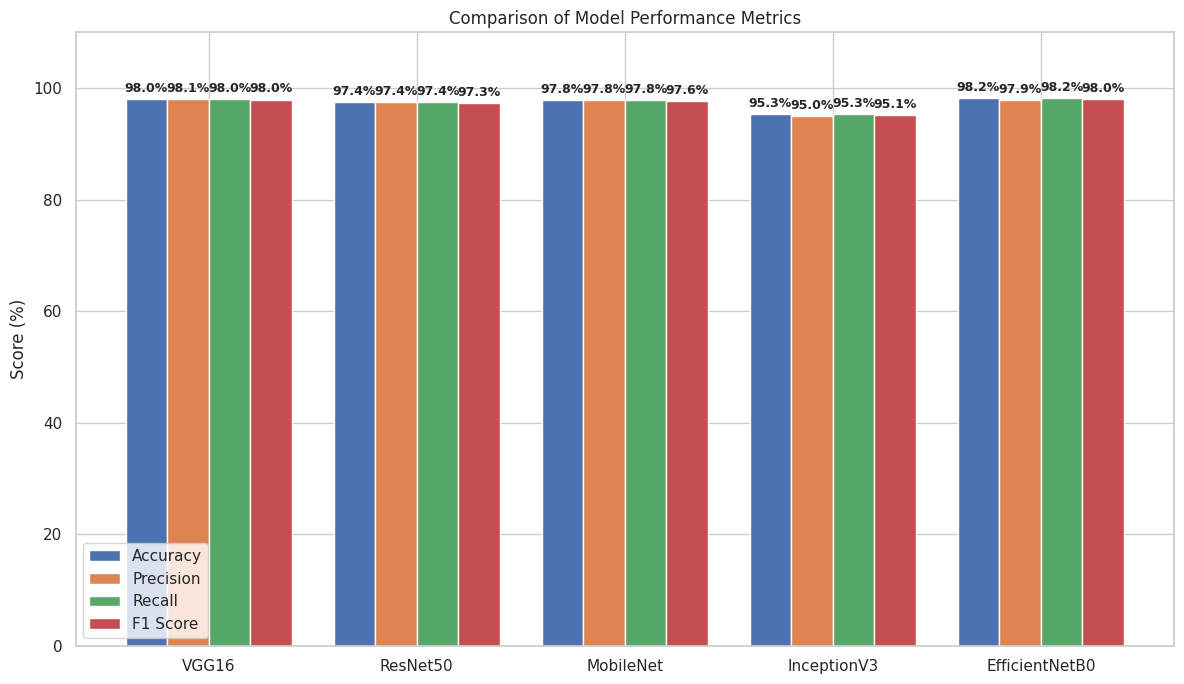

In [ ]:

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = metrics_df['Model'].tolist()
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

# Create the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each metric
rects1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics_df['F1 Score'], width, label='F1 Score')

# Labels
ax.set_ylabel('Score (%)')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)
ax.legend()

# Correct bar labels with '%' symbol
for rects in [rects1, rects2, rects3, rects4]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

fig.tight_layout()
plt.show()
